# Problem Sheet 5
- To be completed by **4pm** on **Friday 8th March** and uploaded to [Problem Sheet 5 submission point](https://moodle.bath.ac.uk/mod/assign/view.php?id=1205934) on Moodle.

## Task (a) (Warm-up): sequential optimisation for eigenvalues
Given a symmetric matrix $A=A^\top \in \mathbb{R}^{n \times n}$ and suppose the first eigenvalue $\lambda_{\max}(A)=\lambda_1(A)$ and eigenvector $\mathbf{u}_{\max}\in\mathbb{R}^n$, $\|\mathbf{u}_{\max}\|_2=1$ are known.

- Prove that the second eigenvalue $\lambda_2(A) \le \lambda_1(A)$ can be found as
$$
\lambda_2(A) = \max_{\mathbf{x} \in \mathbb{R}^n, \|\mathbf{x}\|_2=1, \langle \mathbf{u}_{\max}, \mathbf{x} \rangle = 0}\langle \mathbf{x}, A \mathbf{x} \rangle,
$$
and a maximizer 
$$
\mathbf{x}_* = \arg\max_{\mathbf{x} \in \mathbb{R}^n, \|\mathbf{x}\|_2=1, \langle \mathbf{u}_{\max}, \mathbf{x} \rangle = 0}\langle \mathbf{x}, A \mathbf{x} \rangle
$$
is the corresponding eigenvector.

- Suggest how to implement the constraints $\|\mathbf{x}\|_2=1, \langle \mathbf{u}_{\max}, \mathbf{x} \rangle = 0$ in practice.

## Solution:
Define 
$$
U_2 = \begin{bmatrix}\mathbf{u}_{\max} & \mathbf{x}\end{bmatrix},
$$
such that $U_2^\top U_2 = I$. This requires
$$
U_2^\top U_2 = \begin{bmatrix}\mathbf{u}_{\max}^\top \\ \mathbf{x}^\top\end{bmatrix}\begin{bmatrix}\mathbf{u}_{\max} & \mathbf{x}\end{bmatrix} = \begin{bmatrix}1 & \mathbf{u}_{\max}^\top \mathbf{x} \\ \mathbf{x}^\top \mathbf{u}_{\max} & \|\mathbf{x}\|_2^2\end{bmatrix} = \begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix},
$$
so we get $\mathbf{u}_{\max}^\top \mathbf{x} = \langle \mathbf{u}_{\max}, \mathbf{x} \rangle = 0$, and $\|\mathbf{x}\|_2=1$. Now,
$$
U_2^\top A U_2 = \begin{bmatrix}\mathbf{u}_{\max}^\top \\ \mathbf{x}^\top\end{bmatrix} \begin{bmatrix}\lambda_{\max}(A) \mathbf{u}_{\max} & A \mathbf{x}\end{bmatrix} = \begin{bmatrix}\lambda_{\max}(A) & \lambda_{\max}(A) \mathbf{u}_{\max}^\top \mathbf{x} \\ \mathbf{x}^\top \mathbf{u}_{\max} & \langle \mathbf{x}, A \mathbf{x} \rangle\end{bmatrix}
$$
where in the first row we used that $\mathbf{u}_{\max}^\top A = (A^\top \mathbf{u}_{\max})^\top = \lambda_{\max}(A) \mathbf{u}_{\max}^\top$ and $\mathbf{u}_{\max}^\top \mathbf{u}_{\max}=1$.
Thus,
$$
\mathrm{trace}(U_2^\top A U_2) = \lambda_{\max}(A) + \langle \mathbf{x}, A \mathbf{x} \rangle.
$$
Therefore, 
$$
\max_{U_2^\top U_2 = I} \mathrm{trace}(U_2^\top A U_2) = \lambda_{\max}(A) + \max_{\mathbf{x} \in \mathbb{R}^n, \|\mathbf{x}\|_2=1, \langle \mathbf{u}_{\max}, \mathbf{x} \rangle = 0}\langle \mathbf{x}, A \mathbf{x} \rangle,
$$
and thus solving the maximization problem in question realises the maximization of the trace after Theorem 3.13. The value of $\langle \mathbf{x}_*, A \mathbf{x}_* \rangle$ is the second eigenvalue, and $\mathbf{x}_*$ (the second column of $U_2$) is the second eigenvector.

For the second part, let $\mathbf{x} = (x_1,\ldots,x_n)$, so we have one constraint $\sum_{i=1}^n x_i u_{\max,i} = 0.$
Let $i_* = \arg\max_{i=1,\ldots,n} |u_{\max,i}|$. Note that since $\|\mathbf{u}_{\max}\|_2 = 1$, $u_{\max,i_*} \neq 0$ always. So we can express
$$
x_{i_*} = -\frac{1}{u_{\max,i_*}} \sum_{i=1,i \neq i_*}^n x_i u_{\max,i}
$$
in terms of other elements of $x_i$. For the norm equality, we have
$$
\sum_{i=1,i\neq i_*}^{n} x_i^2 + \frac{1}{u_{\max,i_*}^2} \left(\sum_{i=1,i \neq i_*}^n x_i u_{\max,i}\right)^2 = 1.
$$
Pick any $j_* \neq i_*$ and solve the previous equation as a quadratic equation on $x_{j_*}$.
Finally, plug $x_{i_*},x_{j_*}$ into $\langle \mathbf{x}, A\mathbf{x}\rangle$ and optimise it as a function of the remaining elements of $\mathbf{x}$.

## Task (b): Principal Component Analysis
Consider a dataset $\mathbf{X} = \{\mathbf{x}_1, \mathbf{x}_2\}$, where
$$
\mathbf{x}_1 = \begin{bmatrix}2 \\ 1\end{bmatrix}, \qquad \mathbf{x}_2 = \begin{bmatrix}1 \\ 2\end{bmatrix}.
$$
- Calculate the PCA matrix $A = \frac{1}{m}\sum_{i=1}^{m} \mathbf{x}_i \mathbf{x}_i^\top$.
- Calculate the principal component for $r=1$, that is, a vector $\mathbf{u}\in\mathbb{R}^2$, $\|\mathbf{u}\|_2=1$, corresponding to the maximal eigenvalue of $A$.

_Hint: Consider $\mathbf{u} = (v, \sqrt{1-v^2})^\top$, $-1\le v \le 1$, and solve the variational characterisation problem for $\lambda_{\max}(A)$ with respect to $v$._

## Solution:

$$
A = \frac{1}{2} \left( \begin{bmatrix}2 \\ 1\end{bmatrix} \begin{bmatrix}2 & 1\end{bmatrix} + \begin{bmatrix}1 \\ 2\end{bmatrix} \begin{bmatrix}1 & 2\end{bmatrix} \right) = \frac{1}{2} \begin{bmatrix}4 & 2 \\ 2 & 1 \end{bmatrix} + \frac{1}{2} \begin{bmatrix}1 & 2 \\ 2 & 4 \end{bmatrix} = \begin{bmatrix}5/2 & 2 \\ 2 & 5/2\end{bmatrix}
$$

$$
\langle \mathbf{u}, A \mathbf{u} \rangle = \begin{bmatrix}v, \sqrt{1-v^2}\end{bmatrix} \cdot \begin{bmatrix} 2.5v+2\sqrt{1-v^2}\\ 2v+2.5\sqrt{1-v^2}\end{bmatrix} = 2.5v^2 + 4v\sqrt{1-v^2} + 2.5(1-v^2)
$$
$$
0 = \frac{d \langle \mathbf{u}, A \mathbf{u} \rangle}{dv} = 5v + 4\sqrt{1-v^2} - \frac{4v^2}{\sqrt{1-v^2}} - 5v
$$
Multiplying by $\sqrt{1-v^2}$ and dividing by $4$, we obtain
$$
1-v^2 = v^2
$$
$$
v^2 = 1/2
$$
Thus,
$$
\mathbf{u} = \begin{bmatrix}1/\sqrt{2} \\ 1/\sqrt{2}\end{bmatrix}
$$

## Task (c): VC-dimension of the halfspaces classifier (lower bound)
Consider the halfspaces prediction rule in the homogeneous form,
$$
h_{\boldsymbol\theta}(\mathbf{x}) = \mathrm{sign}(\langle \boldsymbol\theta, \mathbf{x}\rangle) \in \mathcal{H}_n^{hs},
$$
where $\mathbf{x} = \begin{bmatrix}1\\ \mathbf{\hat x}\end{bmatrix}$, $\mathbf{\hat x} \in \mathbb{R}^n$, $\boldsymbol\theta \in \mathbb{R}^{n+1}.$
Consider a dataset 
$$
\mathbf{X} = \begin{bmatrix}\mathbf{x}_1 & \cdots & \mathbf{x}_{n+1} \end{bmatrix} = 
\begin{bmatrix}
1 & 1 & 1 & \cdots & 1 & 1 \\
0 & 1 & 0 & \cdots & 0 & 0 \\
0 & 0 & 1 & \cdots & 0 & 0 \\
\vdots & & & \ddots & & \vdots \\
0 & 0 & 0 & \cdots & 1 & 0 \\
0 & 0 & 0 & \cdots & 0 & 1
\end{bmatrix} \in \mathbb{R}^{(n+1) \times (n+1)}
$$
- Show that $\mathbf{X}$ is shattered by $\mathcal{H}_n^{hs}$, that is, for any $y_1,\ldots,y_{n+1} \in \{-1,1\}$ you can find $\boldsymbol\theta$ such that $h_{\boldsymbol\theta}(\mathbf{x}_i) = y_i$, $i=1,\ldots,n+1$.

_Hint: you can solve the system of linear equations $\langle \boldsymbol\theta, \mathbf{x}_i\rangle = y_i$ exactly, so the $\mathrm{sign}()$ function is not needed in this case._

**Remark:** therefore, $\text{VC-dim}(\mathcal{H}_n^{hs}) \ge n+1$. In fact, one can prove that $\text{VC-dim}(\mathcal{H}_n^{hs}) = n+1$.

## Solution:
Multiplying $\boldsymbol\theta$ with columns of $\mathbf{X}$, we get
\begin{align*}
\langle \boldsymbol\theta, \mathbf{x}_1\rangle & = \theta_1 & = y_{1\phantom{+1}} \\
\langle \boldsymbol\theta, \mathbf{x}_2\rangle & = \theta_1 + \theta_2 & = y_{2\phantom{+1}} \\
& \vdots \\
\langle \boldsymbol\theta, \mathbf{x}_i\rangle & = \theta_1 + \theta_{i} & = y_{i\phantom{+1}} \\
& \vdots \\
\langle \boldsymbol\theta, \mathbf{x}_{n+1}\rangle & = \theta_1 + \theta_{n+1} & = y_{n+1}
\end{align*}
We can resolve this letting $\theta_1 = y_1$ and $\theta_i = y_i - \theta_1 = y_i - y_1$ for $i>1$ for any labels $y_1,\ldots,y_{n+1}$. Since the output is exactly $1$ or $-1$, the $\mathrm{sign}$ does not change it. By Definition 1.25, $\mathbf{X}$ is shattered by $\mathcal{H}_n^{hs}$.

---

## Task 1: PCA computation in Python
The following code generates a dataset $X\in\mathbb{R}^{2 \times m}$ of $m=20$ points where each $\mathbf{x}_i$ is in the form $(x,x+y)^T$, where $x$ is chosen uniformly at random from $[-1,1]$, and $y$ is sampled from the normal distribution with mean zero and variance $0.01$.

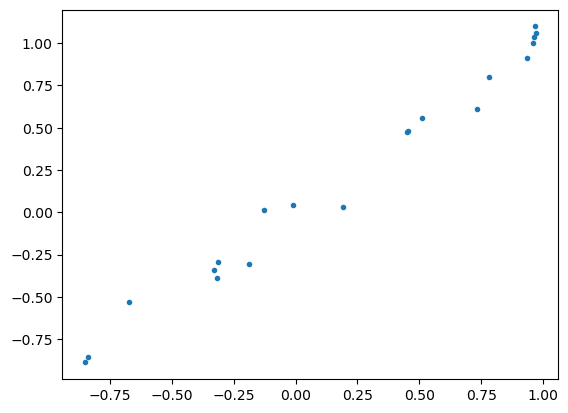

In [2]:
import numpy as np
from matplotlib import pyplot as plt
X1 = np.random.uniform(low=-1, high=1, size=20)
X2 = X1 + np.random.normal(scale=0.1, size=X1.size)
X = np.vstack((X1,X2))
plt.plot(X[0], X[1], '.')
plt.show()

- Compute the PCA matrix $A = \frac{1}{m}\sum_{i=1}^{m} \mathbf{x}_i \mathbf{x}_i^\top$. _Hint: you can avoid using a `for` loop._
- Read about [`numpy.linalg.eigh`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) and compute the eigenvector $\mathbf{u}$ corresponding to the largest eigenvalue of $A$. Does it look close to the $\mathbf{u}$ calculated in Task (b)?

In [7]:
A = (X @ X.T)/X.shape[1]
Lambda, U = np.linalg.eigh(A)
imax = np.argmax(Lambda)
u = U[:,imax]
print("Eigenvector from noisy data: " + str(u) + "\n" 
    + "Eigenvector from ideal data: " + str(np.ones(2)/np.sqrt(2)))

Eigenvector from noisy data: [0.6960942  0.71795046]
Eigenvector from ideal data: [0.70710678 0.70710678]


## Task 2: compression and recovery of data from PCA
- Write a Python code to compress $\mathbf{x}_i$ into $z_i = \mathbf{u}^T \mathbf{x}_i \in \mathbb{R}$, $i=1,\ldots,m$. _(Again, you can use numpy facilities instead of a for loop)_
- Write a Python code to reconstruct the approximate data $\mathbf{\tilde x}_i = \mathbf{u} z_i$.
- Plot both the original data $X = [\mathbf{x}_1,\ldots,\mathbf{x}_m]$ (you can copy the code from Task 1) and the reconstructed data $\tilde X = [\mathbf{\tilde x}_1,\ldots,\mathbf{\tilde x}_m]$ **on the same plot**. How accurate is the reconstruction?

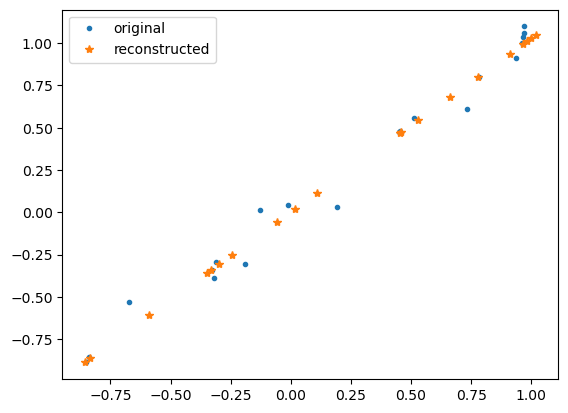

In [6]:
Z = u @ X
Xtilde = np.reshape(u, (2,1)) @ np.reshape(Z, (1,-1))
plt.plot(X[0], X[1], '.', Xtilde[0], Xtilde[1], '*')
plt.legend(('original', 'reconstructed'))
plt.show()